In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_dir = '/content/drive/MyDrive/photos'

In [3]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        img = cv2.imread(image_path)#image into numpy
        tip = imghdr.what(image_path)

In [4]:
type(img)# shows the type of img


numpy.ndarray

In [5]:
img.shape # shows the shape of img in pixel(h,w,colored image)

(256, 384, 3)

In [6]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/photos')#load our data

Found 477 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

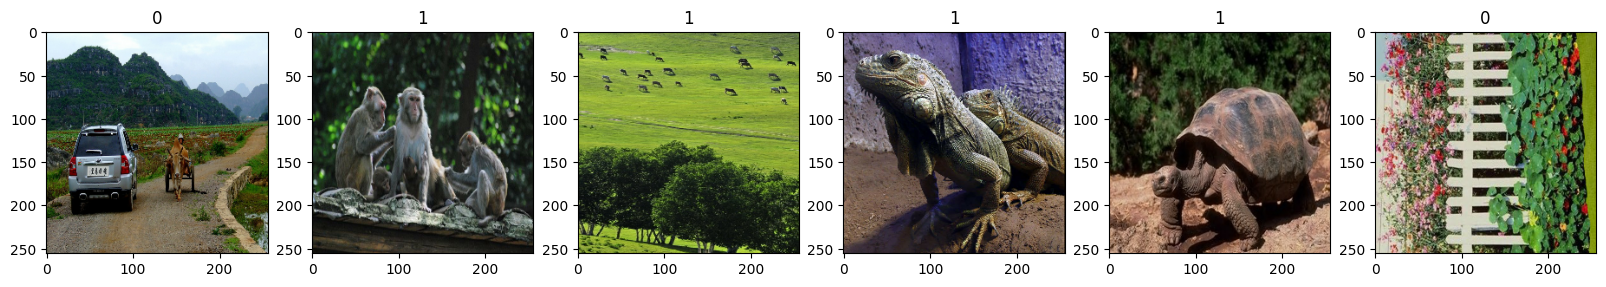

In [9]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])# These checks which data set is labeled as which category

In [ ]:
#so from the above we know that
# 0 is for fake images
# 1 is for real images

In [10]:
batch[0].min() #return the minimum numpy value from the images

0.0

In [11]:
batch[0].max() #return the maximum numpy value from the images

255.0

In [12]:
# to make the number between 0 and 1 we divide them by 255
data = data.map(lambda x,y: (x/255, y)) # map function allow us to scale the data while we pre-processing
# x represent our image an y our label

In [18]:
len(data) # we have a total of 15 batch

15

In [21]:
train_size = int(len(data)*.7)+1 # 11 batch for training
val_size = int(len(data)*.2) # 3 batch for validating
test_size = int(len(data)*.1) # 1 batch for testing

In [29]:
train_size # return the number of batch used for training the model

11

In [28]:
val_size # return the number of batch used for validating the model

3

In [27]:
test_size # return the number of batch used for testing the model

1

In [30]:
train = data.take(train_size)       # here skip and take are  methods inside tensorflow
val = data.skip(train_size).take(val_size)        # take how many batches to allocate
test = data.skip(train_size+val_size).take(test_size)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout #importing layers

In [32]:
model = Sequential()

In [33]:
# adding convultional and pooling methods
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile('Adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
logdirectory='logs'

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdirectory)

In [38]:
history = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
11/11 [==============================] - 30s 3s/step - loss: 0.6165 - accuracy: 0.6733 - val_loss: 0.6390 - val_accuracy: 0.6562
Epoch 2/30
11/11 [==============================] - 29s 3s/step - loss: 0.6180 - accuracy: 0.6790 - val_loss: 0.5592 - val_accuracy: 0.7812
Epoch 3/30
11/11 [==============================] - 27s 2s/step - loss: 0.5908 - accuracy: 0.7131 - val_loss: 0.7926 - val_accuracy: 0.6354
Epoch 4/30
11/11 [==============================] - 27s 2s/step - loss: 0.5875 - accuracy: 0.7216 - val_loss: 0.5352 - val_accuracy: 0.7812
Epoch 5/30
11/11 [==============================] - 26s 2s/step - loss: 0.5127 - accuracy: 0.7301 - val_loss: 0.6033 - val_accuracy: 0.6458
Epoch 6/30
11/11 [==============================] - 27s 2s/step - loss: 0.4467 - accuracy: 0.7869 - val_loss: 0.2900 - val_accuracy: 0.9062
Epoch 7/30
11/11 [==============================] - 25s 2s/step - loss: 0.3956 - accuracy: 0.8267 - val_loss: 0.2733 - val_accuracy: 0.9167
Epoch 8/30
11/11 [==

In [39]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
pre = Precision()
rec = Recall()
bin_acc = BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    bin_acc.update_state(y, yhat)

1/1 [==============================] - 1s 607ms/step


In [42]:
print(pre.result(), rec.result(), bin_acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


Enter the path to the new image: /content/drive/MyDrive/test/tm2.jpg


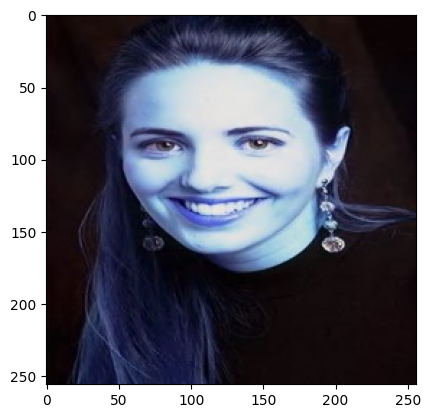

1/1 [==============================] - 0s 67ms/step
The above image Predicted as real


In [98]:
image_path = input("Enter the path to the new image: ")
img = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'The above image Predicted as real')
else:
    print(f'The above image Predicted as fake')

In [99]:
from tensorflow.keras.models import load_model #save the model

In [100]:
model.save(os.path.join('/content/drive/MyDrive/model','Last_RealorFakeimageclassifier.h5'))